In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns

import scipy.stats as stats
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re 

In [2]:
data = pd.read_csv('USvideos.csv')

print(data.shape)

# loading category json file
category_json_path = './US_category_id.json'

# Load and parse the category JSON file
with open(category_json_path) as file:
    category_data = json.load(file)

# Extracting category names from the JSON file
category_dict = {int(category['id']): category['snippet']['title'] for category in category_data['items']}

# Merge the category names with the main dataframe
data['category_name'] = data['category_id'].map(category_dict)


data.head()

(40949, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [3]:
data.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
category_name             object
dtype: object

In [4]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables'.format(len(categorical)))

There are 9 categorical variables


In [5]:
data[categorical].head()

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,SHANtell martin,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...,Entertainment


In [6]:
for var in data.columns:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean())

description 0.013919753840142617


In [7]:
trending_days_count = data.groupby('video_id')['trending_date'].nunique()

trending_days_df = trending_days_count.reset_index()

trending_days_df.rename(columns={'trending_date': 'trending_days'}, inplace=True)

print(trending_days_df.head())

      video_id  trending_days
0  -0CMnp02rNY              6
1  -0NYY8cqdiQ              1
2  -1Hm41N0dUs              3
3  -1yT-K3c6YI              4
4  -2RVw2_QyxQ              3


In [8]:
mean_views_per_video = data.groupby('video_id')['views'].mean()
trending_views_df = pd.DataFrame(mean_views_per_video).merge(pd.DataFrame(trending_days_count), left_index=True, right_index=True)

print(mean_views_per_video)

video_id
-0CMnp02rNY    6.891170e+05
-0NYY8cqdiQ    5.637460e+05
-1Hm41N0dUs    1.835892e+06
-1yT-K3c6YI    1.943108e+05
-2RVw2_QyxQ    6.943467e+04
                   ...     
zwEn-ambXLw    1.893647e+05
zxUwbflE1SY    2.117902e+05
zxwfDlhJIpw    7.724317e+06
zy0b9e40tK8    3.787500e+05
zzQsGL_F9_c    1.766235e+05
Name: views, Length: 6351, dtype: float64


Text(0.5, 1.0, 'Relationship between Number of Days Trending and Average Views')

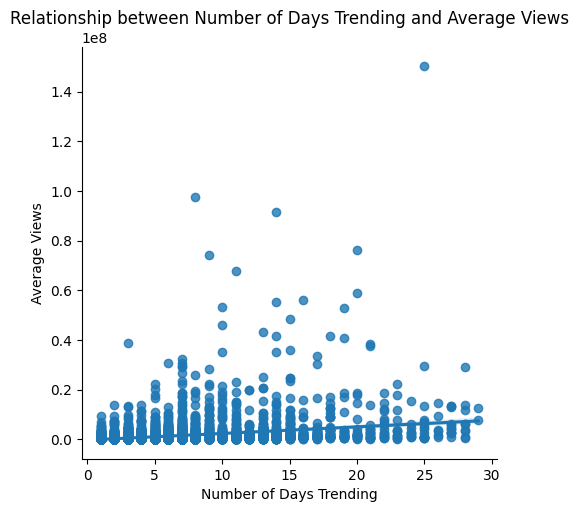

In [9]:
sns.lmplot(x='trending_date', y='views', data=trending_views_df)
plt.xlabel('Number of Days Trending')
plt.ylabel('Average Views')
plt.title('Relationship between Number of Days Trending and Average Views')

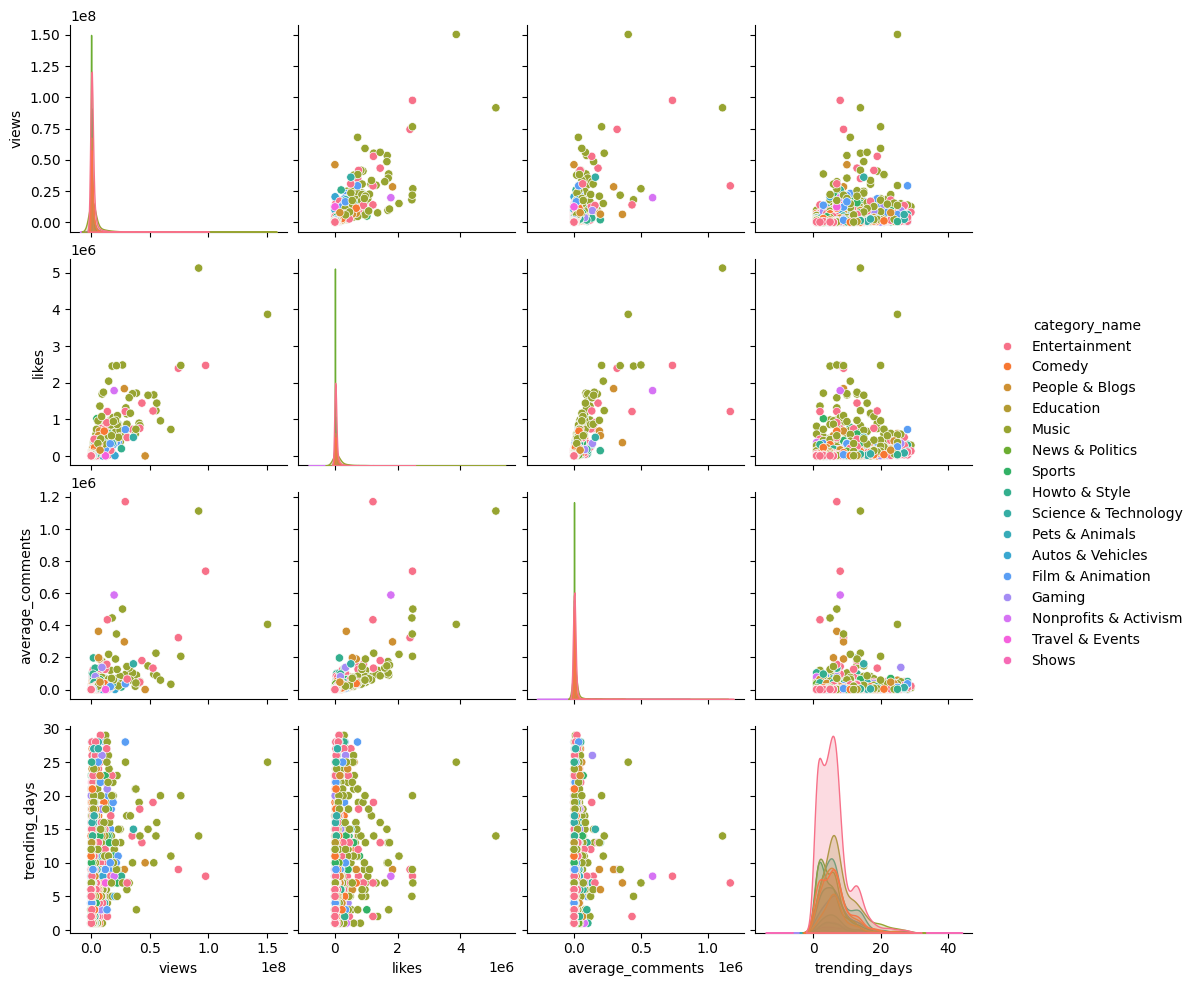

                     views     likes  average_comments  trending_days
views             1.000000  0.831174          0.610545       0.266196
likes             0.831174  1.000000          0.779986       0.213573
average_comments  0.610545  0.779986          1.000000       0.116580
trending_days     0.266196  0.213573          0.116580       1.000000


In [20]:
trending_days = data.groupby('video_id')['trending_date'].nunique()

average_metrics = data.groupby('video_id')[['views', 'likes', 'comment_count']].mean()

merged_data = (average_metrics
               .merge(trending_days, left_index=True, right_index=True)
               .merge(data[['video_id', 'category_name']].drop_duplicates(), left_index=True, right_on='video_id'))

merged_data.rename(columns={'trending_date': 'trending_days', 'comment_count': 'average_comments'}, inplace=True)

sns.pairplot(merged_data, vars=['views', 'likes', 'average_comments', 'trending_days'], hue='category_name')
plt.show()

correlation_matrix = merged_data[['views', 'likes', 'average_comments', 'trending_days']].corr()
print(correlation_matrix)

In [22]:
groups = data.groupby('category_name')['views'].apply(list)
f_val, p_val = stats.f_oneway(*groups)

print('F-value:', f_val)
print('p-value:', p_val)

F-value: 166.16394108097995
p-value: 0.0


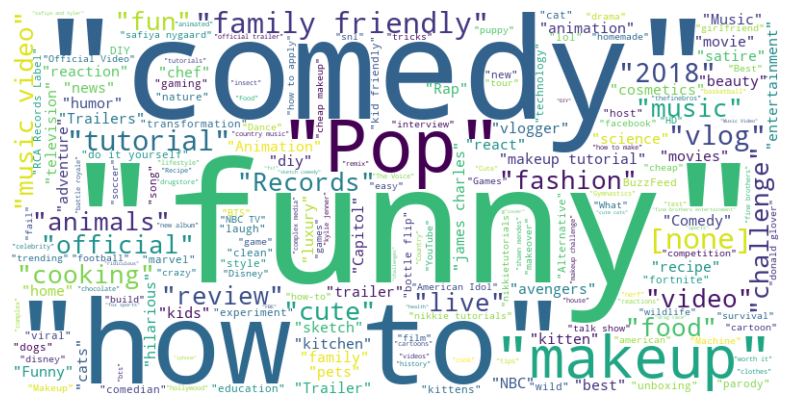

In [23]:
top_trending_videos = trending_days.sort_values(ascending=False).head(int(len(trending_days) * 0.1))

top_videos = data[data['video_id'].isin(top_trending_videos.index)]

tags = '|'.join(top_videos['tags'].dropna()).split('|')
tag_counts = Counter(tags)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
data['likes_to_views_ratio'] = data['likes'] / data['views']
data['comments_to_views_ratio'] = data['comment_count'] / data['views']
data['dislikes_to_views_ratio'] = data['dislikes'] / data['views']

engagement_metrics = data.groupby('video_id').agg({
    'likes_to_views_ratio': 'mean',
    'comments_to_views_ratio': 'mean',
    'dislikes_to_views_ratio': 'mean',
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()

engagement_summary = engagement_metrics.describe()

print(engagement_summary)

       likes_to_views_ratio  comments_to_views_ratio  dislikes_to_views_ratio  \
count           6351.000000              6351.000000              6351.000000   
mean               0.032663                 0.004517                 0.001652   
std                0.026795                 0.005596                 0.004233   
min                0.000000                 0.000000                 0.000000   
25%                0.012477                 0.001588                 0.000517   
50%                0.026573                 0.003032                 0.000890   
75%                0.045249                 0.005319                 0.001592   
max                0.226856                 0.101939                 0.190366   

              views         likes      dislikes  comment_count  
count  6.351000e+03  6.351000e+03  6.351000e+03   6.351000e+03  
mean   1.475769e+06  4.863096e+04  2.542702e+03   5.896016e+03  
std    4.612219e+06  1.665437e+05  2.516670e+04   3.037680e+04  
min    5.5

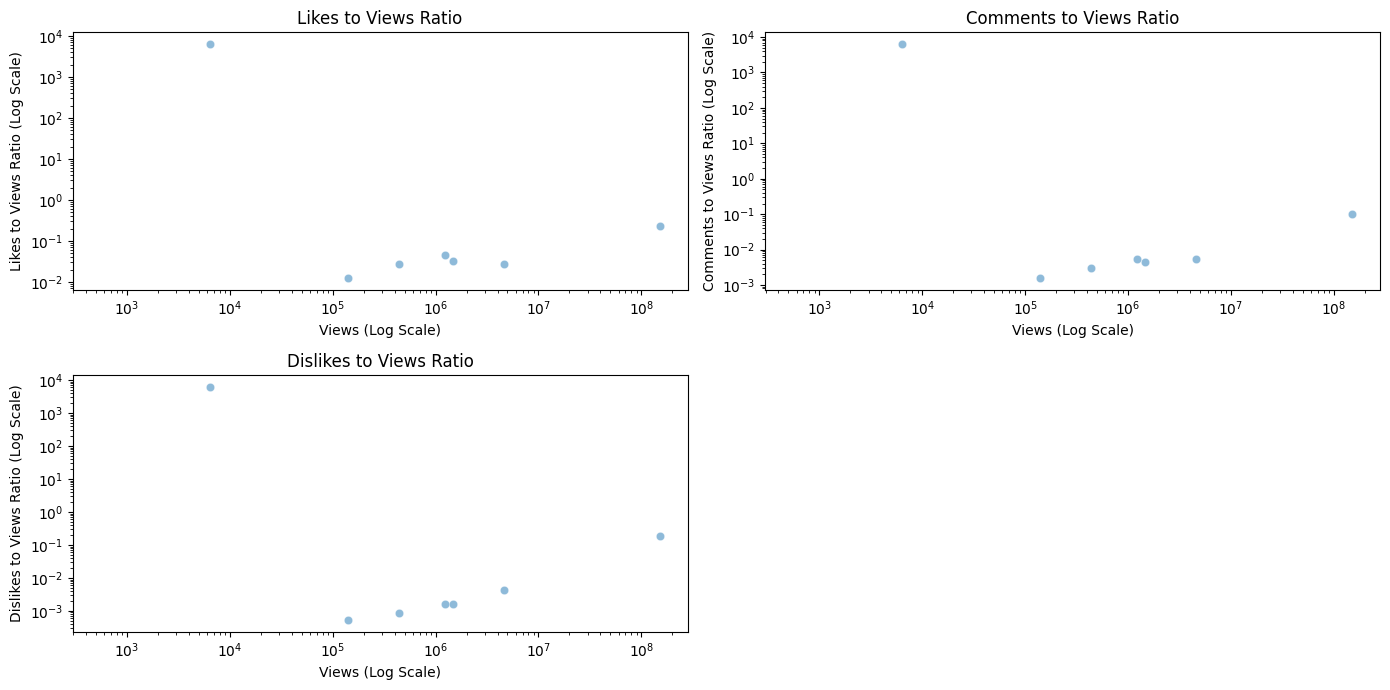

In [25]:
plt.figure(figsize=(14, 7))
plt.subplot(2, 2, 1)
sns.scatterplot(data=engagement_summary, x='views', y='likes_to_views_ratio', alpha=0.5)
plt.title('Likes to Views Ratio')
plt.xscale('log')  
plt.yscale('log') 
plt.xlabel('Views (Log Scale)')
plt.ylabel('Likes to Views Ratio (Log Scale)')

plt.subplot(2, 2, 2)
sns.scatterplot(data=engagement_summary, x='views', y='comments_to_views_ratio', alpha=0.5)
plt.title('Comments to Views Ratio')
plt.xscale('log') 
plt.yscale('log')  
plt.xlabel('Views (Log Scale)')
plt.ylabel('Comments to Views Ratio (Log Scale)')

plt.subplot(2, 2, 3)
sns.scatterplot(data=engagement_summary, x='views', y='dislikes_to_views_ratio', alpha=0.5)
plt.title('Dislikes to Views Ratio')
plt.xscale('log') 
plt.yscale('log') 
plt.xlabel('Views (Log Scale)')
plt.ylabel('Dislikes to Views Ratio (Log Scale)')

plt.tight_layout()
plt.show()

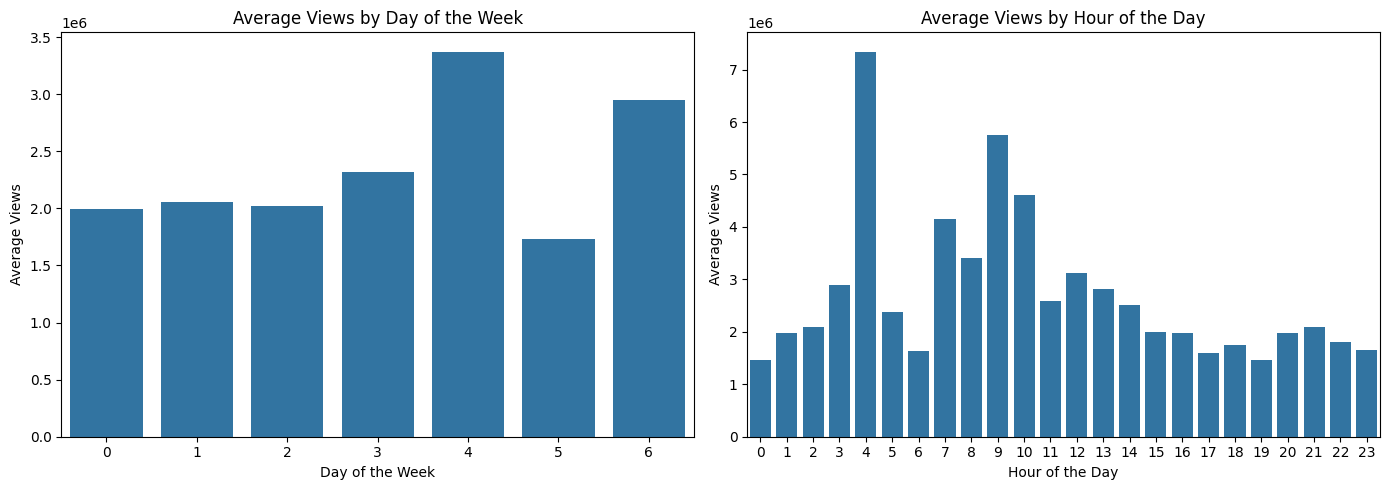

In [26]:
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_day'] = data['publish_time'].dt.dayofweek
data['publish_hour'] = data['publish_time'].dt.hour

day_views = data.groupby('publish_day')['views'].mean()

hour_views = data.groupby('publish_hour')['views'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x=day_views.index, y=day_views.values, ax=axes[0])
axes[0].set_title('Average Views by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Average Views')

sns.barplot(x=hour_views.index, y=hour_views.values, ax=axes[1])
axes[1].set_title('Average Views by Hour of the Day')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Average Views')

plt.tight_layout()
plt.show()

In [27]:
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_day'] = data['publish_time'].dt.dayofweek

groups = [data[data['publish_day'] == i]['views'] for i in range(7)]

f_statistic, p_value = stats.f_oneway(*groups)

alpha = 0.05  
if p_value < alpha:
    print("The differences in average views among days of the week are statistically significant.")
else:
    print("There is no statistically significant difference in average views among days of the week.")

The differences in average views among days of the week are statistically significant.


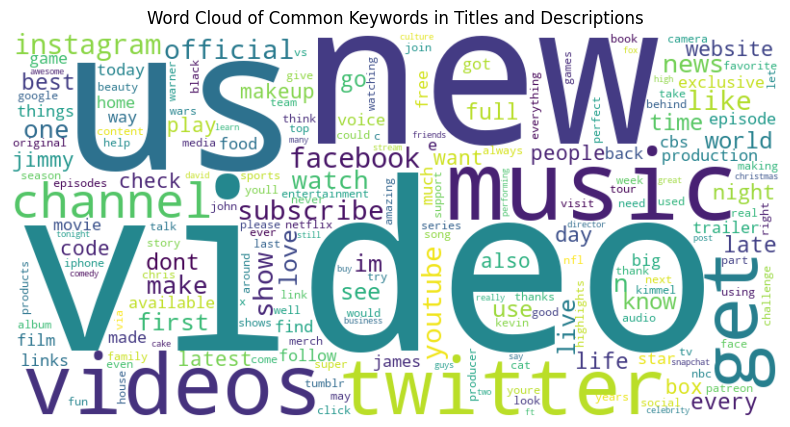

In [28]:
data['text'] = data['title'] + ' ' + data['description']

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = str(text)  
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  
    tokens = text.split()
    tokens = [token for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return tokens

data['tokens'] = data['text'].apply(preprocess)

word_freq = Counter()
for tokens in data['tokens']:
    word_freq.update(tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Keywords in Titles and Descriptions')
plt.show()

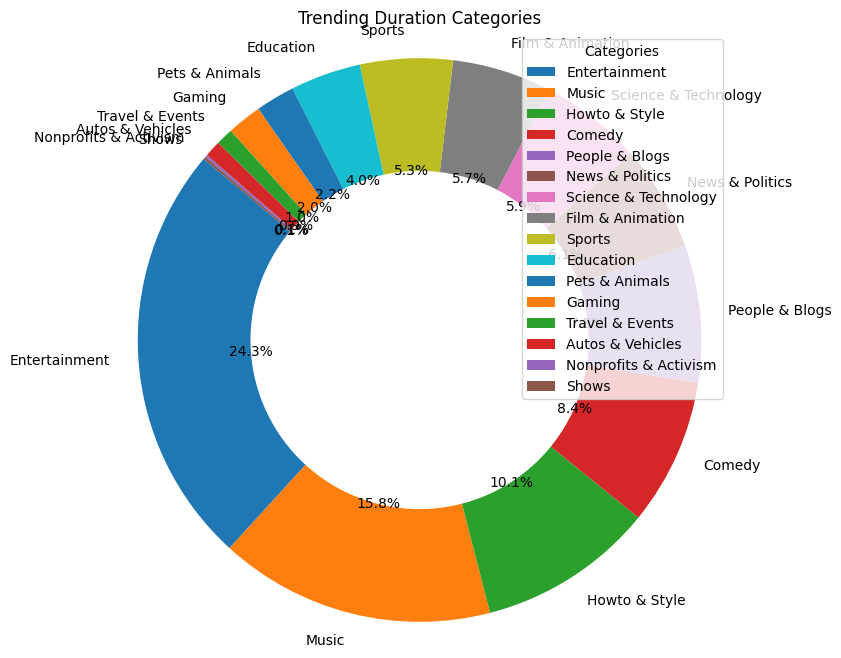

In [29]:
trending_duration_counts = data['category_name'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(trending_duration_counts, labels=trending_duration_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.axis('equal')  
plt.title('Trending Duration Categories')
plt.legend(title='Categories', loc='upper right')
plt.show()